# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

# Business Understanding
Being a football fan and local famous striker means exploring FIFA19 player datsset could be so much fun.

I will focus on the three question below:

Q1: What's the ratio of total wages/ total potential for clubs. Which clubs are the most economical ？

Q2: What's the age distribution like? How is it related to player's overall rating?

Q3: How is a player's skils set influence his potential? Can we predict a player's potential based on his skills' set?



# Loading Dataset


In [2]:
df_players= pd.read_csv('data.csv')

In [3]:
df_players.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [4]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
df_players.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
df_players.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
df_players.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

# Cleaning The Data

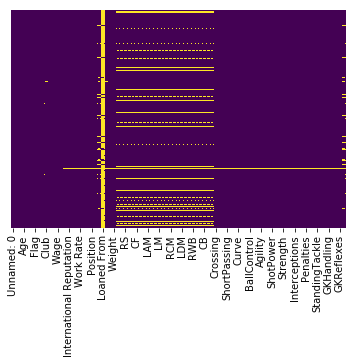

In [8]:
sns.heatmap(df_players.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

# 3. Prepare Data
There are some necessary stpes to apply before continue exploring the dataset:

Drop unused columns

Convert string values to number

Handle missing values, drop them if necessary

In [10]:
columns_to_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Preferred Foot', 
                   'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
                   'Contract Valid Until', 'Height', 'Weight','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                   'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                   'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']

In [11]:
df_players.drop(columns_to_drop,axis=1,inplace=True)

In [12]:
df_players.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [13]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 48 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Position                    18147 non-null object
Crossing                    18159 non-null float64
Finishing                   18159 non-null float64
HeadingAccuracy             18159 non-null float64
ShortPassing                18159 non-n

In [14]:
def string_to_number(amount):
   
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

In [15]:
df_players['Value_M'] = df_players['Value'].apply(lambda x: string_to_number(x)/1000000)
df_players['Wages_K'] = df_players['Wage'].apply(lambda x :string_to_number(x)/1000)

In [16]:
df_players.drop(['Value','Wage'],axis=1,inplace=True)

In [17]:
df_players.head()

,Name,Age,Nationality,Overall,Potential,Club,Special,International Reputation,Weak Foot,Skill Moves,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wages_K
0,L. Messi,31,Argentina,94,94,FC Barcelona,2202,5.0,4.0,4.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110.5,565.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,5.0,4.0,5.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77.0,405.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,5.0,5.0,5.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118.5,290.0
3,De Gea,27,Spain,91,93,Manchester United,1471,4.0,3.0,1.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72.0,260.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,4.0,5.0,4.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102.0,355.0


In [18]:
df_players.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wages_K
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,...,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,2.410696,9.731312
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,...,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,5.594933,21.999290
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.300000,1.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.675000,3.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,2.000000,9.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,118.500000,565.000000


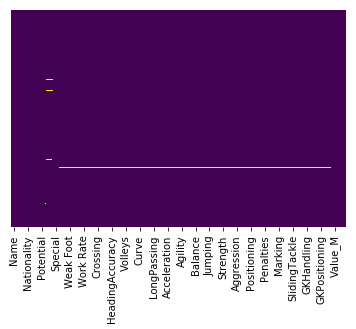

In [19]:
sns.heatmap(df_players.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
df_missing_players = df_players[df_players['Curve'].isnull()]

In [21]:
df_missing_players.sample(10)

,Name,Age,Nationality,Overall,Potential,Club,Special,International Reputation,Weak Foot,Skill Moves,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wages_K
13246,I. Sissoko,22,France,62,68,AS Béziers,1494,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425,2.0
13280,Y. Ammour,19,France,62,77,Montpellier HSC,1478,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650,2.0
13247,F. Hart,28,Austria,62,62,SV Mattersburg,1630,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.240,3.0
13279,P. Mazzocchi,22,Italy,62,69,Perugia,1681,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350,1.0
13261,H. Al Mansour,25,Saudi Arabia,62,64,Al Nassr,1665,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300,5.0
13240,R. Bingham,24,England,62,66,Hamilton Academical FC,1481,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400,1.0
13253,G. Miller,31,Scotland,62,62,Carlisle United,1535,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200,2.0
13266,L. Bengtsson,20,Sweden,62,73,Hammarby IF,1549,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.525,1.0
13252,E. Binaku,22,Albania,62,70,Malmö FF,1587,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375,1.0
13268,L. Garguła,37,Poland,62,62,Miedź Legnica,1542,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100,1.0


In [22]:
df_missing_players.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wages_K
count,48.000000,48.0,48.000000,48.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000,48.000000
mean,25.000000,62.0,66.833333,1562.229167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354375,1.687500
std,4.472136,0.0,5.272705,127.956981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117354,0.992659
min,17.000000,62.0,62.000000,1141.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,1.000000
25%,22.000000,62.0,62.000000,1506.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,1.000000
50%,25.000000,62.0,65.500000,1576.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337500,1.000000
75%,27.000000,62.0,70.000000,1664.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425000,2.000000
max,37.000000,62.0,82.000000,1740.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650000,5.000000


We can see that quite a few columns which are related to players' skills got 48 missing values.

So there were 48 players that simply missing these values.

But we will reserve those players for Q1 and Q2 since there were no missing value in Value_M and Wage_K column.

For Q3, we will drop those player rows since there were just too many missing values here.

# DataAnalytics


## Ratio of total wages / total potential for clubs(which clubs are most economical?)

In [23]:
club_wages = df_players.groupby('Club').sum()

In [24]:
club_wages

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wages_K
Club,,,,,,,,,,,,,,,,,,,,,
SSV Jahn Regensburg,744,1902,2010,44680,29.0,90.0,65.0,1368.0,1261.0,1605.0,...,1431.0,1310.0,1246.0,463.0,469.0,427.0,467.0,470.0,23.095,123.0
1. FC Heidenheim 1846,672,1841,2014,43784,28.0,83.0,65.0,1385.0,1274.0,1397.0,...,1235.0,1307.0,1241.0,486.0,471.0,418.0,477.0,452.0,27.490,125.0
1. FC Kaiserslautern,620,1648,1817,39631,26.0,82.0,58.0,1250.0,1082.0,1322.0,...,1100.0,1150.0,1145.0,416.0,399.0,388.0,395.0,391.0,16.195,44.0
1. FC Köln,681,1982,2144,46807,37.0,85.0,68.0,1466.0,1291.0,1518.0,...,1474.0,1471.0,1378.0,521.0,494.0,541.0,500.0,503.0,135.910,372.0
1. FC Magdeburg,642,1706,1829,39850,27.0,86.0,55.0,1209.0,1166.0,1320.0,...,1215.0,1207.0,1167.0,406.0,430.0,408.0,406.0,448.0,20.525,127.0
1. FC Nürnberg,690,1996,2173,47089,31.0,88.0,74.0,1477.0,1321.0,1556.0,...,1380.0,1461.0,1386.0,488.0,475.0,464.0,496.0,488.0,77.640,309.0
1. FC Union Berlin,707,1913,2054,45573,29.0,87.0,70.0,1414.0,1337.0,1516.0,...,1293.0,1298.0,1260.0,461.0,466.0,465.0,459.0,468.0,49.485,382.0
1. FSV Mainz 05,758,2267,2473,53272,37.0,103.0,78.0,1677.0,1477.0,1739.0,...,1519.0,1566.0,1472.0,644.0,624.0,584.0,621.0,629.0,138.355,498.0
AC Ajaccio,622,1496,1605,36844,24.0,69.0,55.0,1172.0,1062.0,1255.0,...,997.0,1070.0,982.0,333.0,345.0,323.0,328.0,363.0,18.530,69.0


In [25]:
club_player_count = df_players.groupby("Club").count()

In [26]:
club_player_count

,Name,Age,Nationality,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wages_K
Club,,,,,,,,,,,,,,,,,,,,,
SSV Jahn Regensburg,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
1. FC Heidenheim 1846,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
1. FC Kaiserslautern,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
1. FC Köln,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
1. FC Magdeburg,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
1. FC Nürnberg,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
1. FC Union Berlin,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
1. FSV Mainz 05,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
AC Ajaccio,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23


In [27]:
#Number of clubs and avarage number of players in each club
print('Total Number of Club is {}'.format(club_player_count.shape[0]))
print('Avg Number of players in each club is {}'.format(round(club_player_count['Name'].mean(),3)))
print('Total Average Wage(k) and Potential Ratio is {}'.format(round(club_wages['Wages_K'].sum() / club_wages['Potential'].sum(),2)))

Total Number of Club is 651
Avg Number of players in each club is 27.598
Total Average Wage(k) and Potential Ratio is 0.14


In [28]:
# Finding this details for all clubs
club_wages['Wage/Potential'] = club_wages['Wages_K'] / club_wages['Potential']
club_wages['Player_Number'] = club_player_count['Name'] 
club_wages['Player Avg Age']= club_wages['Age'] / club_wages['Player_Number']

In [29]:
club_wages.sort_values('Wage/Potential',ascending=False, inplace=True)
club_wages.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wages_K,Wage/Potential,Player_Number,Player Avg Age
Club,,,,,,,,,,,,,,,,,,,,,
Real Madrid,793,2582,2793,60025,69.0,106.0,94.0,1934.0,1750.0,1887.0,...,627.0,627.0,583.0,579.0,615.0,874.425,5017.0,1.796276,33,24.030303
FC Barcelona,787,2575,2815,60791,74.0,108.0,94.0,1974.0,1805.0,1850.0,...,599.0,601.0,623.0,615.0,617.0,852.600,4837.0,1.718295,33,23.848485
Juventus,679,2057,2138,47610,63.0,80.0,72.0,1517.0,1282.0,1583.0,...,419.0,402.0,386.0,438.0,450.0,704.475,3292.0,1.539757,25,27.160000
Manchester City,789,2532,2769,60617,69.0,104.0,92.0,1970.0,1726.0,1852.0,...,592.0,570.0,578.0,577.0,560.0,786.555,3741.0,1.351029,33,23.909091
Manchester United,817,2549,2728,62117,69.0,106.0,100.0,2054.0,1862.0,2056.0,...,547.0,545.0,563.0,537.0,565.0,588.850,3391.0,1.243035,33,24.757576


Text(0.5, 1.0, 'Top 10 clubs spending wage(K) on players potential')

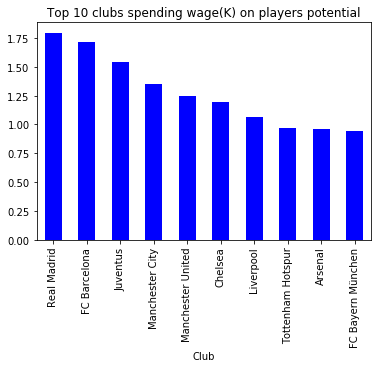

In [30]:
club_wages['Wage/Potential'].head(10).plot(kind='bar', color='Blue')
plt.title('Top 10 clubs spending wage(K) on players potential')

Text(0.5, 1.0, 'Top 10 economical clubs ')

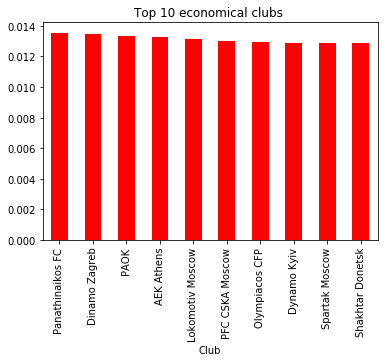

In [31]:
club_wages['Wage/Potential'].tail(10).plot(kind='bar', color='red')
plt.title('Top 10 economical clubs ')

From the result and plot, it's obvious that the 'Giant' clubs including Real Madrid, Bacelona, and clubs from EPL are willing to spend much more wage for high potential players than average clubs. This is how they stay competitive in leagues.

But surprisingly, the economical clubs are not clubs from nowhere that we never heard of. Some of them are even quite famous like AEK Athens, Dynamo Kyiv. This suggests that those clubs' players are potiential but underpayed. It maybe a good approach for 'Giant' clubs to import more econimical players from them to reduce their overall wage spent.

## Age Distribution and how its related to Players Overall Rating

In [32]:
age_count = df_players ['Age'].value_counts()
age_count.sort_index(ascending =True,inplace=True)

In [33]:
age_count.head()

16      42
17     289
18     732
19    1024
20    1240
Name: Age, dtype: int64

In [34]:
age_count_list = age_count.values.tolist()
age_mean = df_players.groupby('Age').mean()
age_overall_rating_list = age_mean['Overall'].values.tolist()

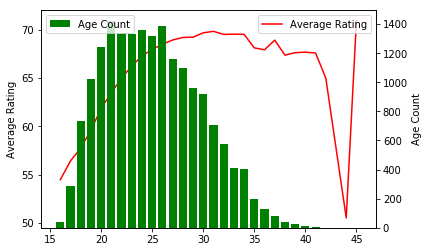

In [35]:
ages = age_count.index.values.tolist()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ages,age_overall_rating_list, color = 'red', label='Average Rating')
ax1.legend(loc=1)
ax1.set_ylabel('Average Rating')

ax2 = ax1.twinx()
plt.bar(ages, age_count_list, label='Age Count',color='green')
ax2.legend(loc=2)
ax2.set_ylabel('Age Count')
plt.show()

From above plot, we can see that most players are between 20-26 years old. And players' number start to decrease after 26 years old and speed up after 30. Reason behind this could be that many young player didn't get enough opportunities to prove themselves and give up their dream as a football player.

When a football player reaches their late 20s, they have gain enough experience and reaches peak of their rating. The golden era of a football player starts here and ends when his age reaches 35. At this age, his physical body condition drops quickly so as average rating.

There are also quite a few numbers of players with age over 37, 38 years old. This is quite a surprise especially their rating still can remain quite high.

# Data Analytics with ML

In [36]:
columns_to_drop = ['Name', 'Nationality', 'Club']
df_players.drop(columns_to_drop, axis=1, inplace=True)

In [37]:
df_players.dropna(axis=0,how ='any',inplace=True)

In [38]:
df_players

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Crossing,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wages_K
0,31,94,94,2202,5.0,4.0,4.0,Medium/ Medium,RF,84.0,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110.50,565.0
1,33,94,94,2228,5.0,4.0,5.0,High/ Low,ST,84.0,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77.00,405.0
2,26,92,93,2143,5.0,5.0,5.0,High/ Medium,LW,79.0,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118.50,290.0
3,27,91,93,1471,4.0,3.0,1.0,Medium/ Medium,GK,17.0,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72.00,260.0
4,27,91,92,2281,4.0,5.0,4.0,High/ High,RCM,93.0,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102.00,355.0
5,27,91,91,2142,4.0,4.0,4.0,High/ Medium,LF,81.0,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,93.00,340.0
6,32,91,91,2280,4.0,4.0,4.0,High/ High,RCM,86.0,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,67.00,420.0
7,31,91,91,2346,5.0,4.0,3.0,High/ Medium,RS,77.0,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,80.00,455.0
8,32,91,91,2201,4.0,3.0,3.0,High/ Medium,RCB,66.0,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,51.00,380.0
9,25,90,93,1331,3.0,3.0,1.0,Medium/ Medium,GK,13.0,...,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,68.00,94.0


In [39]:
df_players['Work Rate Attack'] = df_players['Work Rate'].map(lambda x: x.split('/')[0])
df_players['Work Rate Defence'] = df_players['Work Rate'].map(lambda x: x.split('/')[1])
df_players.drop('Work Rate', axis=1, inplace=True)

In [40]:
df_players.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Position,Crossing,Finishing,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wages_K,Work Rate Attack,Work Rate Defence
0,31,94,94,2202,5.0,4.0,4.0,RF,84.0,95.0,...,26.0,6.0,11.0,15.0,14.0,8.0,110.5,565.0,Medium,Medium
1,33,94,94,2228,5.0,4.0,5.0,ST,84.0,94.0,...,23.0,7.0,11.0,15.0,14.0,11.0,77.0,405.0,High,Low
2,26,92,93,2143,5.0,5.0,5.0,LW,79.0,87.0,...,33.0,9.0,9.0,15.0,15.0,11.0,118.5,290.0,High,Medium
3,27,91,93,1471,4.0,3.0,1.0,GK,17.0,13.0,...,13.0,90.0,85.0,87.0,88.0,94.0,72.0,260.0,Medium,Medium
4,27,91,92,2281,4.0,5.0,4.0,RCM,93.0,82.0,...,51.0,15.0,13.0,5.0,10.0,13.0,102.0,355.0,High,High


In [41]:
# One Hot Encoding for Position, Work Rate Attack, Work Rate Defence
one_hot_columns = ['Position', 'Work Rate Attack', 'Work Rate Defence']
df_players = pd.get_dummies(df_players, columns=one_hot_columns, prefix = one_hot_columns).

In [42]:
print(df_players.head())

df_players.shape

   Age  Overall  Potential  Special  International Reputation  Weak Foot  \
0   31       94         94     2202                       5.0        4.0   
1   33       94         94     2228                       5.0        4.0   
2   26       92         93     2143                       5.0        5.0   
3   27       91         93     1471                       4.0        3.0   
4   27       91         92     2281                       4.0        5.0   

   Skill Moves  Crossing  Finishing  HeadingAccuracy  \
0          4.0      84.0       95.0             70.0   
1          5.0      84.0       94.0             89.0   
2          5.0      79.0       87.0             62.0   
3          1.0      17.0       13.0             21.0   
4          4.0      93.0       82.0             55.0   

             ...              Position_RS  Position_RW  Position_RWB  \
0            ...                        0            0             0   
1            ...                        0            0        

(18147, 76)

# Train Model and Measure Performance

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [49]:
y = df_players['Potential']
X = df_players.drop(['Value_M', 'Wages_K', 'Potential', 'Overall'], axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [51]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predictions and evaluation using DecisionTree

In [52]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix


In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          48       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         1
          52       0.50      0.17      0.25         6
          53       0.00      0.00      0.00         1
          54       0.50      0.50      0.50         2
          55       0.00      0.00      0.00         6
          56       0.00      0.00      0.00         8
          57       0.05      0.07      0.06        14
          58       0.07      0.10      0.08        21
          59       0.18      0.14      0.16        51
          60       0.04      0.04      0.04        48
          61       0.06      0.06      0.06        72
          62       0.18      0.14      0.16       119
          63       0.10      0.12      0.11       143
          64       0.12      0.13      0.12       204
          65       0.13      0.15      0.14       208
          66       0.18    

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
print(confusion_matrix(y_test,predictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# So we can't use decision tree in predictions we have to use Random Forrest

In [42]:
y = df_players['Potential']
X = df_players.drop(['Value_M', 'Wages_K', 'Potential', 'Overall'], axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [45]:
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))


0.8714064884235864
4.914184478971534


In [46]:
coefs_df = pd.DataFrame()

coefs_df['Features'] = X_train.columns
coefs_df['Coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(10)

,Features,Coefs
14,BallControl,0.262929
18,Reactions,0.201994
0,Age,0.179893
32,StandingTackle,0.066983
38,GKReflexes,0.025664
34,GKDiving,0.023093
1,Special,0.019232
7,HeadingAccuracy,0.016610
26,Interceptions,0.015520
31,Marking,0.015283


Ball control, reactions, and age are the main three features that decides a player's potential. This is same to our perception.

Young players with excellent ball control and fast reactions tends to give us an outstanding performance in football match.

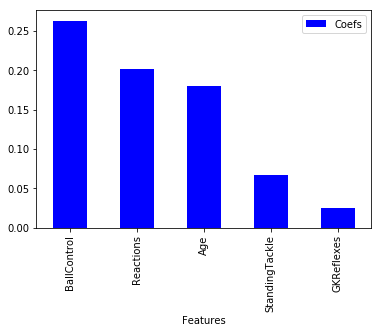

In [47]:
coefs_df.set_index('Features', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', color='blue')